## OU NOISE SIMULATION

In [109]:
import matplotlib.animation as animation

from brian2 import *


### global parameters
defaultclock.dt = 15*ms


### simulation code
def run_sim_ou(N, K, Delta, omega_0, duration, random_seed=214040893):
    #start_scope()
    seed(random_seed)
    D = 0.5*Hz**2
    r = 1.0*second
    eqs = '''
    dTheta/dt = omega + K/N*coupling + noise: 1 #unit of theta not dtheta
    dnoise/dt = -noise/r + sqrt(D)/r: Hz
    omega : Hz(constant) # intrinsic frequency
    coupling : 1
    '''

    oscillators = NeuronGroup(N, eqs, method='euler')
    oscillators.Theta = np.random.rand(N)  # same initial phase angle

    
    oscillators.noise = 0.0 * Hz


    #CHANGE THIS TO ANOTHER VALUE
    lorentzian_omegas = omega_0 + Delta * np.tan(np.pi * (np.random.rand(N) - 0.5))
    #lorentzian_omegas = omega_0
    oscillators.omega = lorentzian_omegas


    connections = Synapses(oscillators, oscillators,
                        'coupling_post = sin(Theta_pre - Theta_post) : 1 (summed)')
    connections.connect()  # all-to-all

    mon = StateMonitor(oscillators, 'Theta', record=True)

   # Variable to hold the current value of z
    z_values = []
    @network_operation()
    def compute_z():
        # Calculate z(t) using the current phases
        z = np.mean(np.exp(1j * oscillators.Theta))
        z_values.append(z)

    net = Network(oscillators, connections, mon, compute_z)
    net.run(duration)

    return z_values
        

## Normal Noise Simulation

In [144]:
import matplotlib.animation as animation

from brian2 import *


### global parameters
defaultclock.dt = 15*ms


### simulation code
def run_sim_normal(N, K, Delta, omega_0, duration, random_seed=214040893):
    #start_scope()
    seed(random_seed)
    eqs = '''
    dTheta/dt = omega + K/N*coupling + noise: 1 #unit of theta not dtheta
    omega : Hz(constant) # intrinsic frequency
    coupling : 1
    noise : Hz
    '''

    oscillators = NeuronGroup(N, eqs, method='euler')
    oscillators.Theta = np.random.rand(N)  # same initial phase angle

    
    oscillators.noise = np.random.normal(0, 1, N) * Hz


    #CHANGE THIS TO ANOTHER VALUE
    lorentzian_omegas = omega_0 + Delta * np.tan(np.pi * (np.random.rand(N) - 0.5))
    #lorentzian_omegas = omega_0
    oscillators.omega = lorentzian_omegas


    connections = Synapses(oscillators, oscillators,
                        'coupling_post = sin(Theta_pre - Theta_post) : 1 (summed)')
    connections.connect()  # all-to-all

    mon = StateMonitor(oscillators, 'Theta', record=True)

   # Variable to hold the current value of z
    z_values = []
    @network_operation()
    def compute_z():
        # Calculate z(t) using the current phases
        z = np.mean(np.exp(1j * oscillators.Theta))
        z_values.append(z)

    net = Network(oscillators, connections, mon, compute_z)
    net.run(duration)

    return z_values

# Non-Gaussian Noise Simulation

In [134]:
import matplotlib.animation as animation

from brian2 import *


### global parameters
defaultclock.dt = 15*ms


### simulation code
def run_sim_non_gaussian(N, K, Delta, omega_0, duration, random_seed=214040893):
    #start_scope()
    seed(random_seed)
    eqs = '''
    dTheta/dt = omega + K/N*coupling + noise: 1 #unit of theta not dtheta
    omega : Hz(constant) # intrinsic frequency
    coupling : 1
    noise : Hz
    '''

    oscillators = NeuronGroup(N, eqs, method='euler')
    oscillators.Theta = np.random.rand(N)  # same initial phase angle

    spike_probability = 0.2 
    spike_magnitude = 5 
    impulse_noise = (np.random.rand(N) < spike_probability) * np.random.uniform(-spike_magnitude, spike_magnitude, N)
    oscillators.noise = impulse_noise * Hz


    #CHANGE THIS TO ANOTHER VALUE
    lorentzian_omegas = omega_0 + Delta * np.tan(np.pi * (np.random.rand(N) - 0.5))
    #lorentzian_omegas = omega_0
    oscillators.omega = lorentzian_omegas


    connections = Synapses(oscillators, oscillators,
                        'coupling_post = sin(Theta_pre - Theta_post) : 1 (summed)')
    connections.connect()  # all-to-all

    mon = StateMonitor(oscillators, 'Theta', record=True)

   # Variable to hold the current value of z
    z_values = []
    @network_operation()
    def compute_z():
        # Calculate z(t) using the current phases
        z = np.mean(np.exp(1j * oscillators.Theta))
        z_values.append(z)

    net = Network(oscillators, connections, mon, compute_z)
    net.run(duration)

    return z_values

In [ ]:
arr = [10.0, 3.5, 1.4]
neuron_values = np.arange(10, 180, 10)
synch_values_non_gaussian = []
sigma = 2*pi/(24) * Hz
Delta = sigma
min = 1.1
max = 52.1
step_size = 0.5
for count in neuron_values: 
    K = arr[0] * Delta      # Coupling strength
    F = arr[1] * Delta # Amplitude of external driving force
    Omega = arr[2] * Delta
    omega_0 = sigma - Omega
    #plt.figure(figsize=(4, 4))
    z_ou_done = False
    z_normal_done = False
    z_non_gaussian_done = False
    for I in np.arange(min, max, step_size): #Can potentially change to binary search??
        K  = I * Hz
        z_final_non_gaussian = run_sim_non_gaussian(count, K, Delta, omega_0, 5*second)
        if(not z_normal_done and abs(z_final_non_gaussian[-1]) > 0.99) :
            #print(f'Synchronized at {I}*Hz for initial_value at {count} neurons')
            synch_values_non_gaussian.append(I)
            z_non_gaussian_done = True
            break
    if(not z_non_gaussian_done) :
        synch_values_non_gaussian.append(70.1)

In [158]:
arr = [10.0, 3.5, 1.4]
neuron_values = np.arange(10, 180, 18)
synch_values_ou = []
synch_values_normal = []
synch_values_non_gaussian = []
sigma = 2*pi/(24) * Hz
Delta = sigma
for count in neuron_values: 
    K = arr[0] * Delta      # Coupling strength
    F = arr[1] * Delta # Amplitude of external driving force
    Omega = arr[2] * Delta
    omega_0 = sigma - Omega
    #plt.figure(figsize=(4, 4))
    z_ou_done = False
    z_normal_done = False
    for I in np.arange(1.1, 52.1, 0.5): #Can potentially change to binary search??
        K  = I * Hz
        if(not z_ou_done) :
            z_final_ou = run_sim_ou(count, K, Delta, omega_0, 5*second)
        if(not z_normal_done) : 
            z_final_normal = run_sim_normal(count, K, Delta, omega_0, 5*second)
        #print(f'z_value = {abs(z_final[-1])}\n')
        if(not z_ou_done and abs(z_final_ou[-1]) > 0.99) :
            #print(f'Synchronized at {I}*Hz for initial_value at {count} neurons')
            synch_values_ou.append(I)
            print(I)
            z_ou_done = True
        if(not z_normal_done and abs(z_final_normal[-1]) > 0.99) :
            #print(f'Synchronized at {I}*Hz for initial_value at {count} neurons')
            synch_values_normal.append(I)
            z_normal_done = True
            
        if(z_normal_done and z_ou_done) :
            break
    if(not z_ou_done) :
        synch_values_ou.append(70.1)
    if(not z_normal_done) :
        synch_values_normal.append(70.1)
        #plt.plot(z_real, z_imag, label=labels[i], color=colors[i])
    # Labels and formatting
    # plt.xlabel("Re(z)")
    # plt.ylabel("Im(z)")
    # plt.title(f"Panel: {count}")
    # plt.legend()
    # plt.axis("equal")
    # plt.grid()
# plt.show()

6.6


WARNING    'N' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value np.int64(28). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


15.6


WARNING    'N' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value np.int64(46). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'N' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value np.int64(64). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


15.1
10.1


WARNING    'N' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value np.int64(82). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


9.6
12.6


WARNING    'N' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value np.int64(118). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


12.6


WARNING    'N' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value np.int64(136). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'N' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value np.int64(154). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


15.6
16.1


WARNING    'N' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value np.int64(172). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


18.1


In [159]:
print(synch_values_normal)

[np.float64(14.6), np.float64(27.1), np.float64(9.1), np.float64(17.1), np.float64(48.1), np.float64(39.6), np.float64(17.6), np.float64(13.6), np.float64(17.6), np.float64(11.1)]


# Graph Noise Comparisons

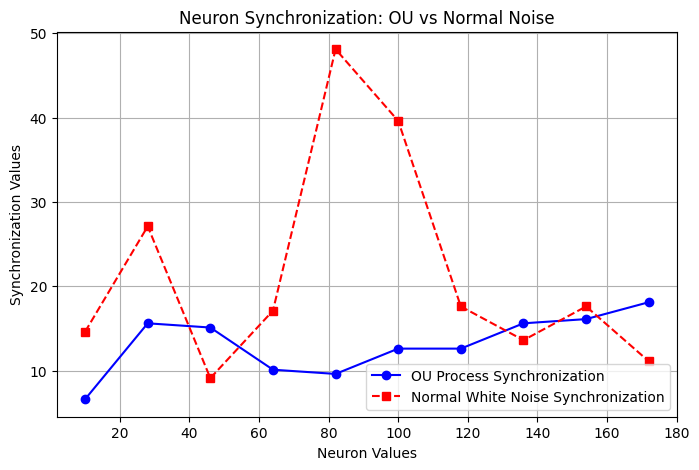

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(neuron_values, synch_values_ou, marker='o', linestyle='-', color='b', label='OU Process Synchronization')
plt.plot(neuron_values, synch_values_normal, marker='s', linestyle='--', color='r', label='Normal White Noise Synchronization')
#plt.plot(neuron_values, synch_values_non_gaussian, marker='l', linestyle='-', color='g', label= 'Non-Gaussian (Spike) Noise Synchronization')
# Labels and title
plt.xlabel("Neuron Values")
plt.ylabel("Synchronization Values")
plt.title("Neuron Synchronization: OU vs Normal Noise")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
#Types of noises for refrence 

#constant/normal noise
    #noise = 0
    #noise = 2

#Random noise
    #noise = np.random.rand(N)


#gaussian noise
    # gaussian_noise = np.random.normal(0, 1, N)
    # gaussian_noise = np.random.normal(5, 1, N)

#non-gaussian noise (impulses)
    # spike_probability = 0.2 
    # spike_magnitude = 5 
    # impulse_noise = (np.random.rand(N) < spike_probability) * np.random.uniform(-spike_magnitude, spike_magnitude, N)

#non-gaussian noise (Poisson Noise)
    # lambda_param = 3  # Average rate of spikes
    # poisson_noise = np.random.poisson(lambda_param, N) - lambda_param  # Center at 0